# Oversampling

## 🎯 1. Apa Itu Imbalanced Dataset?

Dalam banyak kasus klasifikasi, jumlah data antar kelas tidak seimbang.
Misalnya pada dataset iris:

| Species              | Jumlah Data |
| -------------------- | ----------- |
| iris-setosa          |      15     |
| iris-versicolor      |      50     |
| iris-virginica       |      50     |

Di sini terlihat bahwa kelas iris-setosa jauh lebih sedikit dibandingkan iris-versicolor dan iris-virginica.
Kondisi seperti ini disebut imbalanced dataset (dataset tidak seimbang).

Masalahnya:

- Model cenderung berpihak pada kelas mayoritas (misal "iris-versicolor" dan "iris-virginica")
- Akurasi bisa tinggi, tapi model tidak benar-benar pintar. Misal model selalu menebak "iris-versicolor" atau "iris-virginica", akurasi tinggi karena kelas mayoritas besar.

---

## 🧩 2. Apa Itu Oversampling?

Oversampling adalah salah satu cara mengatasi class imblance dengan menambahkan jumlah data dari kelas minoritas, agar jumlahnya setara dengan kelas mayoritas.

Tujuan:
    Membuat model belajar secara adil dari ketiga kelas.

Ada dua cara utama:
1. Random Oversampling
2. SMOTE (Synthetic Minority Oversampling Technique)

---

## 🧮 3. Random Oversampling

Metode paling sederhana, cukup menggandakan data dari kelas minoritas sampai jumlahnya seimbang.

contoh:

- Kelas mayoritas (iris-versicolor dan iris-virginica) = 50 dan 50
- Kelas minoritas (iris-setosa) = 15

    -> Random oversampling akan menyalin data "iris-setosa" secara acak sampai total juga 50.

Kelemahannya:

- Bisa menyebabkan overfitting, karena data yang digandakan sama persis.

---

## 🧠 4. Apa Itu SMOTE (Synthetic Minority Oversampling Technique)?

SMOTE adalah teknik cerdas untuk oversampling yang tidak hanya menyalin data minoritas, tetapi membuat data sintetis (baru) berdasarkan data yang sudah ada.

### 🔹 Cara Kerja SMOTE

Misal kita punya 1 data minoritas yaitu iris-setosa

SMOTE akan:

1. Pilih satu titik minoritas secara acak
2. Pilih tetangga terdekat dari titik tersebut
3. Buat data baru diantara keduannya

Proses diatas diulang sampai jumlah kelas minoritas sama dengan mayoritas.

---

## Load dataset from database

Pastikan kamu sudah install:

- `mysql-connector-python` (untuk MySQL)
- `psycopg2` atau `sqlalchemy` (untuk PostgreSQL)
- `pandas`

In [12]:
import pandas as pd
from sqlalchemy import create_engine

USER = "root"
PASSWORD = ""
HOST = "localhost"
PORT = 3306
DBNAME = "iris_dataset"

# Buat koneksi ke MySQL (pakai driver PyMySQL)
engine = create_engine(f"mysql+pymysql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}")

# Query ke database MySQL
query = "SELECT * FROM iris_1;"
df = pd.read_sql(query, engine)

print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0  36            5.0           3.2            1.2           0.2  Iris-setosa
1  37            5.5           3.5            1.3           0.2  Iris-setosa
2  38            4.9           3.1            1.5           0.1  Iris-setosa
3  39            4.4           3.0            1.3           0.2  Iris-setosa
4  40            5.1           3.4            1.5           0.2  Iris-setosa


## Scatter Plot PCA iris

explained variance ratio (first two components): [0.8962252 0.0647599]


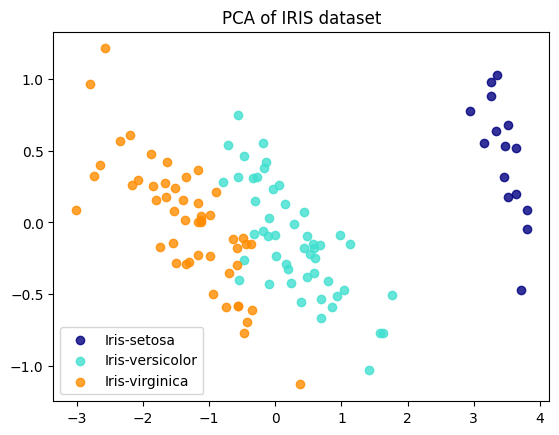

In [ ]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

x = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = LabelEncoder().fit_transform(df["Species"])
target_names = df["Species"].unique()

# PCA
pca = PCA(n_components=2)
X_r = pca.fit(x).transform(x)

print("explained variance ratio (first two components): %s"
      % str(pca.explained_variance_ratio_))

# Visualisasi PCA
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
for color, i, target_name in zip(colors, range(len(target_names)), target_names):
    plt.scatter(
        X_r[y == i, 0], 
        X_r[y == i, 1], 
        color=color, 
        alpha=0.8, 
        label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.show()

## Oversampling using imbalanced with SMOTE

Distribusi sebelum SMOTE : {0: 15, 1: 50, 2: 50}
Distribusi sesudah SMOTE : {0: 50, 1: 50, 2: 50}


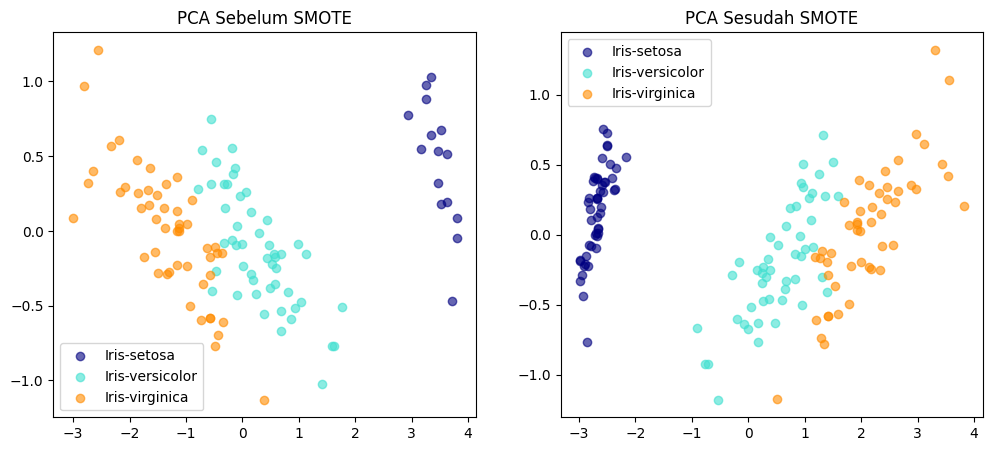

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import numpy as np

# Pisahkan fitur & target
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = LabelEncoder().fit_transform(df["Species"])
target_names = df["Species"].unique()

# Oversampling dengan SMOTE (imbalanced-learn)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Distribusi sebelum SMOTE :", dict(zip(*np.unique(y, return_counts=True))))
print("Distribusi sesudah SMOTE :", dict(zip(*np.unique(y_res, return_counts=True))))

# PCA sebelum SMOTE
pca = PCA(n_components=2)
X_r_before = pca.fit(X).transform(X)

# PCA sesudah SMOTE
X_r_after = pca.fit(X_res).transform(X_res)

# Visualisasi sebelum dan sesudah SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
colors = ["navy", "turquoise", "darkorange"]

# Plot sebelum SMOTE
for color, i, target_name in zip(colors, range(len(target_names)), target_names):
    axes[0].scatter(
        X_r_before[y == i, 0], 
        X_r_before[y == i, 1],
        alpha=0.6, 
        color=color, 
        label=target_name
    )
axes[0].set_title("PCA Sebelum SMOTE")
axes[0].legend()

# Plot sesudah SMOTE
for color, i, target_name in zip(colors, range(len(target_names)), target_names):
    axes[1].scatter(
        X_r_after[y_res == i, 0], 
        X_r_after[y_res == i, 1],
        alpha=0.6, 
        color=color, 
        label=target_name
    )
axes[1].set_title("PCA Sesudah SMOTE")
axes[1].legend()

plt.show()

## Classification With Naive Bayes

### Before SMOTE

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Pisahkan fitur & target
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = LabelEncoder().fit_transform(df["Species"])
target_names = df["Species"].unique()

# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Distribusi sebelum SMOTE :", dict(zip(*np.unique(y, return_counts=True))))

# ======================================================
# 1. Naive Bayes pada data sebelum SMOTE
# ======================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)
nb_before = GaussianNB()
nb_before.fit(X_train, y_train)
y_pred_before = nb_before.predict(X_test)

print("\n=== Hasil Naive Bayes Sebelum SMOTE ===")
print("Akurasi:", accuracy_score(y_test, y_pred_before))
print(classification_report(y_test, y_pred_before, target_names=target_names))


Distribusi sebelum SMOTE : {0: 15, 1: 50, 2: 50}

=== Hasil Naive Bayes Sebelum SMOTE ===
Akurasi: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        23
      macro avg       1.00      1.00      1.00        23
   weighted avg       1.00      1.00      1.00        23



### After SMOTE

In [ ]:
print("Distribusi sesudah SMOTE :", dict(zip(*np.unique(y_res, return_counts=True))))

# ======================================================
# 2. Naive Bayes pada data sesudah SMOTE
# ======================================================
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_res, 
    y_res, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_res
)
nb_after = GaussianNB()
nb_after.fit(X_train_res, y_train_res)
y_pred_after = nb_after.predict(X_test_res)

print("\n=== Hasil Naive Bayes Sesudah SMOTE ===")
print("Akurasi:", accuracy_score(y_test_res, y_pred_after))
print(classification_report(y_test_res, y_pred_after, target_names=target_names))

Distribusi sesudah SMOTE : {0: 50, 1: 50, 2: 50}

=== Hasil Naive Bayes Sesudah SMOTE ===
Akurasi: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



## Bagging Classifier

Distribusi sebelum SMOTE : {0: 15, 1: 50, 2: 50}
Distribusi sesudah SMOTE : {0: 50, 1: 50, 2: 50}

=== Hasil Bagging Sebelum SMOTE ===
Akurasi: 0.9142857142857143
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.93      0.87      0.90        15
 Iris-virginica       0.88      0.93      0.90        15

       accuracy                           0.91        35
      macro avg       0.93      0.93      0.93        35
   weighted avg       0.92      0.91      0.91        35



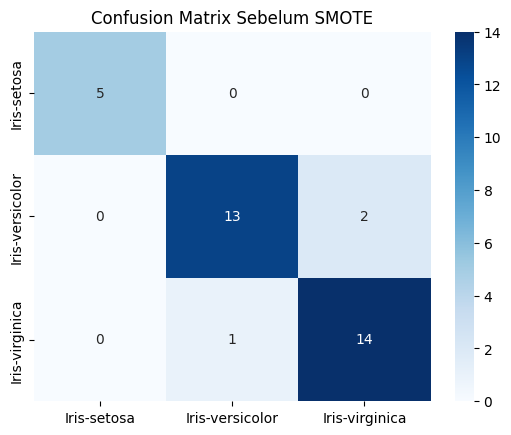


=== Hasil Bagging Sesudah SMOTE ===
Akurasi: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.93      0.90        15
 Iris-virginica       0.93      0.87      0.90        15

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



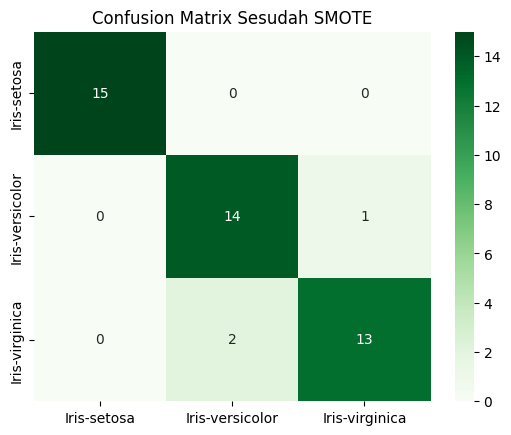

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

# Pisahkan fitur & target
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = LabelEncoder().fit_transform(df["Species"])
target_names = df["Species"].unique()

# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Distribusi sebelum SMOTE :", dict(zip(*np.unique(y, return_counts=True))))
print("Distribusi sesudah SMOTE :", dict(zip(*np.unique(y_res, return_counts=True))))

# ======================================================
# 1. Bagging Classifier pada data sebelum SMOTE
# ======================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

bag_before = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bag_before.fit(X_train, y_train)
y_pred_before = bag_before.predict(X_test)

print("\n=== Hasil Bagging Sebelum SMOTE ===")
print("Akurasi:", accuracy_score(y_test, y_pred_before))
print(classification_report(y_test, y_pred_before, target_names=target_names))

# Confusion matrix
cm_before = confusion_matrix(y_test, y_pred_before)
sns.heatmap(
    cm_before, 
    annot=True, 
    fmt="d", 
    cmap="Blues",
    xticklabels=target_names, 
    yticklabels=target_names
)
plt.title("Confusion Matrix Sebelum SMOTE")
plt.show()

# ======================================================
# 2. Bagging Classifier pada data sesudah SMOTE
# ======================================================
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

bag_after = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bag_after.fit(X_train_res, y_train_res)
y_pred_after = bag_after.predict(X_test_res)

print("\n=== Hasil Bagging Sesudah SMOTE ===")
print("Akurasi:", accuracy_score(y_test_res, y_pred_after))
print(classification_report(y_test_res, y_pred_after, target_names=target_names))

# Confusion matrix
cm_after = confusion_matrix(y_test_res, y_pred_after)
sns.heatmap(
    cm_after, 
    annot=True, 
    fmt="d", 
    cmap="Greens",
    xticklabels=target_names, 
    yticklabels=target_names
)
plt.title("Confusion Matrix Sesudah SMOTE")
plt.show()


## Data Bank

Distribusi sebelum SMOTE: {0: 39922, 1: 5289}
Distribusi sesudah SMOTE: {0: 39922, 1: 39922}

=== Naive Bayes Sebelum SMOTE ===
Akurasi: 0.8636832792686523
              precision    recall  f1-score   support

          no       0.93      0.91      0.92     11977
         yes       0.43      0.51      0.47      1587

    accuracy                           0.86     13564
   macro avg       0.68      0.71      0.69     13564
weighted avg       0.87      0.86      0.87     13564


=== Naive Bayes Sesudah SMOTE ===
Akurasi: 0.8837772397094431
              precision    recall  f1-score   support

          no       0.89      0.87      0.88     11977
         yes       0.87      0.90      0.89     11977

    accuracy                           0.88     23954
   macro avg       0.88      0.88      0.88     23954
weighted avg       0.88      0.88      0.88     23954


=== Bagging Sebelum SMOTE ===
Akurasi: 0.9024624004718372
              precision    recall  f1-score   support

          no 

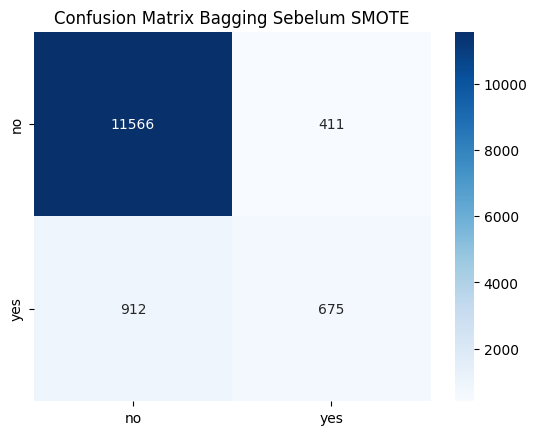


=== Bagging Sesudah SMOTE ===
Akurasi: 0.9389246054938633
              precision    recall  f1-score   support

          no       0.94      0.94      0.94     11977
         yes       0.94      0.94      0.94     11977

    accuracy                           0.94     23954
   macro avg       0.94      0.94      0.94     23954
weighted avg       0.94      0.94      0.94     23954



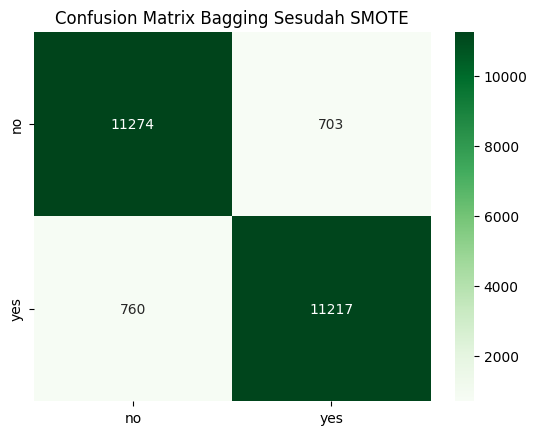

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Baca data CSV ===
df = pd.read_csv("./data/bank-full.csv", sep=";")  # ganti dengan nama file csv kamu

# print(df.columns)

# === 2. Pisahkan fitur dan target ===
X = df.drop(columns=["y"])   # semua kolom kecuali target
y = df["y"]

# Encode data kategorikal jadi numerik
X = pd.get_dummies(X, drop_first=True)
le = LabelEncoder()
y = le.fit_transform(y)   # "no" → 0, "yes" → 1

print("Distribusi sebelum SMOTE:", dict(zip(*np.unique(y, return_counts=True))))

# === 3. SMOTE untuk balancing ===
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Distribusi sesudah SMOTE:", dict(zip(*np.unique(y_res, return_counts=True))))

# ======================================================
# 4. Naive Bayes Sebelum & Sesudah SMOTE
# ======================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_before = nb.predict(X_test)

print("\n=== Naive Bayes Sebelum SMOTE ===")
print("Akurasi:", accuracy_score(y_test, y_pred_before))
print(classification_report(y_test, y_pred_before, target_names=le.classes_))

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_res, 
    y_res, 
    test_size=0.3, 
    random_state=42, 
    stratify=y_res
)
nb.fit(X_train_res, y_train_res)
y_pred_after = nb.predict(X_test_res)

print("\n=== Naive Bayes Sesudah SMOTE ===")
print("Akurasi:", accuracy_score(y_test_res, y_pred_after))
print(classification_report(y_test_res, y_pred_after, target_names=le.classes_))

# ======================================================
# 5. Bagging Classifier Sebelum & Sesudah SMOTE
# ======================================================
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(), 
    n_estimators=50, 
    random_state=42
)

bag.fit(X_train, y_train)
y_pred_bag_before = bag.predict(X_test)

print("\n=== Bagging Sebelum SMOTE ===")
print("Akurasi:", accuracy_score(y_test, y_pred_bag_before))
print(classification_report(y_test, y_pred_bag_before, target_names=le.classes_))

cm_before = confusion_matrix(y_test, y_pred_bag_before)
sns.heatmap(cm_before, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix Bagging Sebelum SMOTE")
plt.show()

bag.fit(X_train_res, y_train_res)
y_pred_bag_after = bag.predict(X_test_res)

print("\n=== Bagging Sesudah SMOTE ===")
print("Akurasi:", accuracy_score(y_test_res, y_pred_bag_after))
print(classification_report(y_test_res, y_pred_bag_after, target_names=le.classes_))

cm_after = confusion_matrix(y_test_res, y_pred_bag_after)
sns.heatmap(
    cm_after, 
    annot=True, 
    fmt="d", 
    cmap="Greens",
    xticklabels=le.classes_, 
    yticklabels=le.classes_
)
plt.title("Confusion Matrix Bagging Sesudah SMOTE")
plt.show()
